In [2]:
import os
os.chdir("../")
import dotenv
dotenv.load_dotenv(override=True)

True

In [53]:
import collections
import json
from pathlib import Path

import numpy as np
import pandas as pd
import re
import datasets
import tqdm

import matplotlib.pyplot as plt
import seaborn as sns

In [39]:

def read_results_jsonl(results_jsonl):
    results_jsonl = Path(results_jsonl)

    ds_metrics_records = []
    with open(results_jsonl, "r") as f:
        for line in tqdm.tqdm(f):
            data = json.loads(line)

            dataset_name = data['dataset_name']
            average_num_correct = data['average_num_correct']
            pass_at_num_rollouts = data['pass_at_num_rollouts']
            majority_at_num_rollouts = data['majority_at_num_rollouts']

            ds_metrics_records.append({
                "dataset_name": dataset_name,
                "average_num_correct": average_num_correct,
                "majority_at_num_rollouts": majority_at_num_rollouts,
                "pass_at_num_rollouts": pass_at_num_rollouts,
            })

    df = pd.DataFrame(ds_metrics_records)
    df_mean = df.groupby("dataset_name").mean().reset_index()
    # convert it to percentage
    df_mean['average_num_correct'] = df_mean['average_num_correct'] * 100
    df_mean['pass_at_num_rollouts'] = df_mean['pass_at_num_rollouts'] * 100
    df_mean['majority_at_num_rollouts'] = df_mean['majority_at_num_rollouts'] * 100
    model_name = results_jsonl.parent.name
    df_mean['model_name'] = model_name
    return df_mean


In [43]:
results_jsonl = "outputs/temp_0.5-n_5/v0/Qwen2.5-VL-3B-Instruct/regraded_eval_results.jsonl"
# set dataset_name as index
df_mean = read_results_jsonl(results_jsonl)
df_mean

8216it [00:00, 39176.42it/s]


,dataset_name,average_num_correct,majority_at_num_rollouts,pass_at_num_rollouts,model_name
0,MMMU-medical,42.470588,49.411765,71.176471,Qwen2.5-VL-3B-Instruct
1,MedXpertQA-MM,20.490982,21.392786,47.444890,Qwen2.5-VL-3B-Instruct
2,pathvqa_closed,60.761452,66.240333,91.612136,Qwen2.5-VL-3B-Instruct
3,pmc_vqa,43.650000,47.300000,73.400000,Qwen2.5-VL-3B-Instruct
4,slake_closed,59.038462,60.096154,88.461538,Qwen2.5-VL-3B-Instruct
5,vqa_rad_closed,62.647059,70.588235,90.073529,Qwen2.5-VL-3B-Instruct


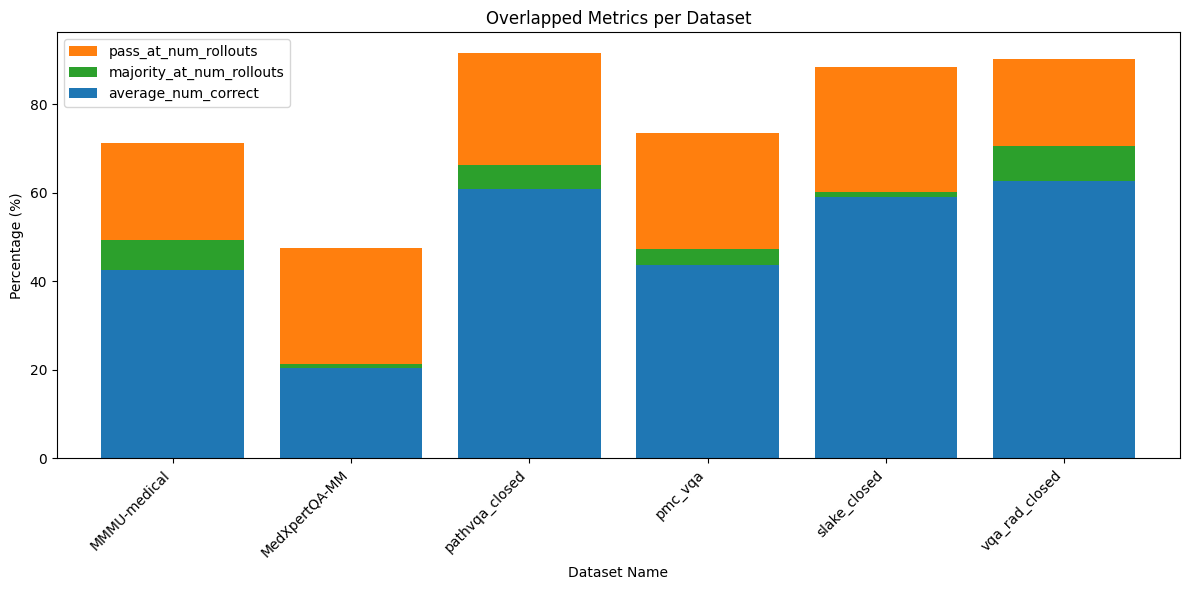

In [44]:
import seaborn
import matplotlib.pyplot as plt

# plot bar chart of average_num_correct, pass_at_num_rollouts, majority_at_num_rollouts
fig, ax = plt.subplots(figsize=(12, 6))
width = 0.8  # full width for overlap

df_mean['pass_at_num_rollouts'].plot(kind='bar', ax=ax, width=width, alpha=1.0, color='C1', label='pass_at_num_rollouts')
df_mean['majority_at_num_rollouts'].plot(kind='bar', ax=ax, width=width, alpha=1.0, color='C2', label='majority_at_num_rollouts')
df_mean['average_num_correct'].plot(kind='bar', ax=ax, width=width, alpha=1.0, color='C0', label='average_num_correct')

ax.set_xticklabels(df_mean['dataset_name'], rotation=45, ha='right')

ax.set_ylabel('Percentage (%)')
ax.set_xlabel('Dataset Name')
ax.set_title('Overlapped Metrics per Dataset')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()


8216it [00:00, 39841.01it/s]
8216it [00:00, 48770.29it/s]
8216it [00:00, 35804.73it/s]


In [47]:
# df all: dataset_name, model_name, average_num_correct, pass_at_num_rollouts, majority_at_num_rollouts
df_all

,dataset_name,average_num_correct,majority_at_num_rollouts,pass_at_num_rollouts,model_name
0,MMMU-medical,42.470588,49.411765,71.176471,Qwen2.5-VL-3B-Instruct
1,MedXpertQA-MM,20.490982,21.392786,47.444890,Qwen2.5-VL-3B-Instruct
2,pathvqa_closed,60.761452,66.240333,91.612136,Qwen2.5-VL-3B-Instruct
3,pmc_vqa,43.650000,47.300000,73.400000,Qwen2.5-VL-3B-Instruct
4,slake_closed,59.038462,60.096154,88.461538,Qwen2.5-VL-3B-Instruct
5,vqa_rad_closed,62.647059,70.588235,90.073529,Qwen2.5-VL-3B-Instruct
6,MMMU-medical,50.705882,52.941176,78.823529,train-qwen2_5_vl_3b-m23k-step_320
7,MedXpertQA-MM,22.314629,22.695391,47.595190,train-qwen2_5_vl_3b-m23k-step_320
8,pathvqa_closed,62.724569,65.199286,88.964902,train-qwen2_5_vl_3b-m23k-step_320
9,pmc_vqa,47.450000,48.600000,71.600000,train-qwen2_5_vl_3b-m23k-step_320


8216it [00:00, 39627.42it/s]
8216it [00:01, 7075.24it/s]
8216it [00:00, 9817.32it/s] 
8216it [00:00, 48890.27it/s]
8216it [00:00, 43523.19it/s]
8216it [00:00, 47989.84it/s]


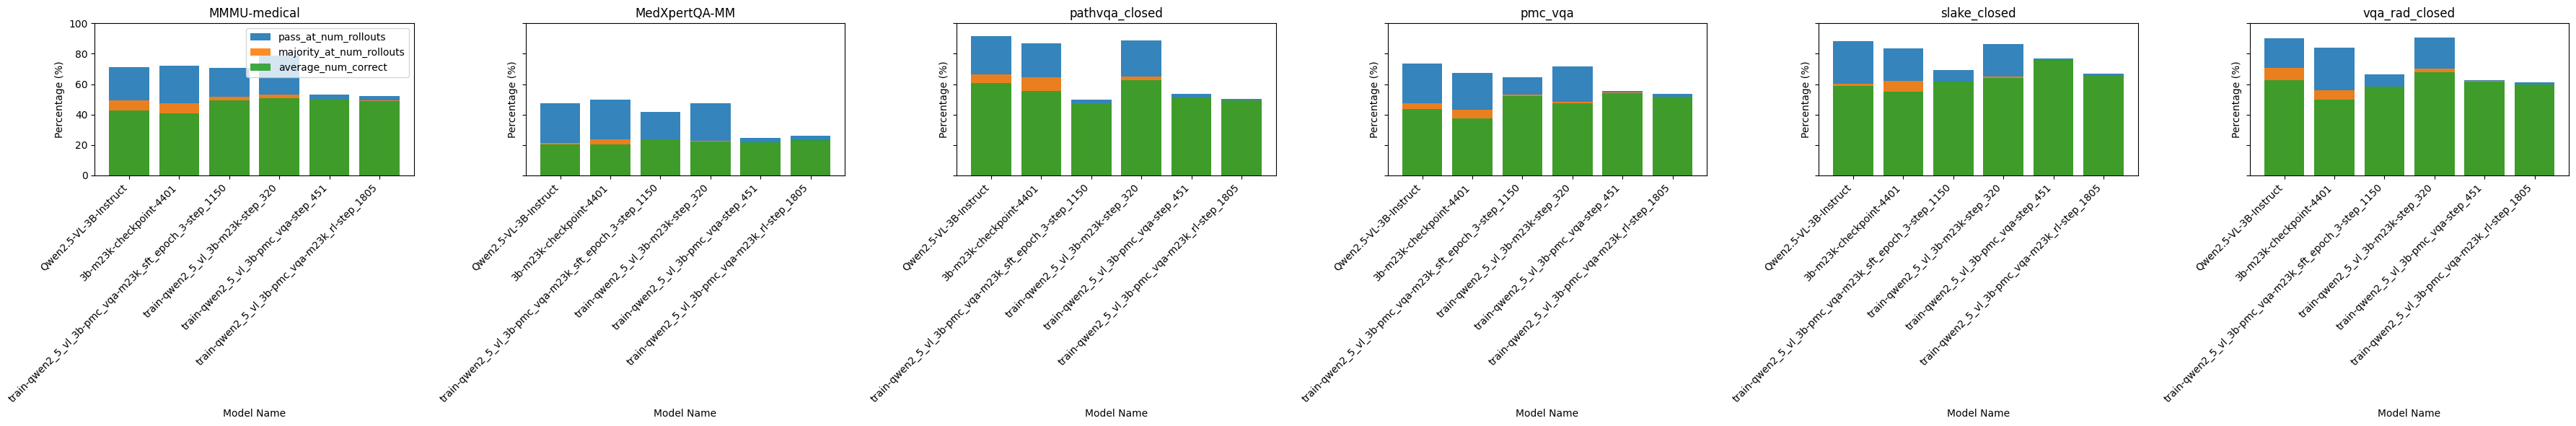

In [67]:
results_jsonl_list = [
    "outputs/temp_0.5-n_5/v0/Qwen2.5-VL-3B-Instruct/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/3b-m23k-checkpoint-4401/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-pmc_vqa-m23k_sft_epoch_3-step_1150/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-m23k-step_320/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-pmc_vqa-step_451/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-pmc_vqa-m23k_rl-step_1805/regraded_eval_results.jsonl",
]
df_list = []
for results_jsonl in results_jsonl_list:
    df_mean = read_results_jsonl(results_jsonl)
    df_list.append(df_mean)
df_all = pd.concat(df_list, ignore_index=True)

metrics = ['pass_at_num_rollouts', 'majority_at_num_rollouts', 'average_num_correct', ]
colors = ['C0', 'C1', 'C2']
alphas = [0.9, 0.9, 0.9]

datasets = df_all['dataset_name'].unique()
n_datasets = len(datasets)

fig, axes = plt.subplots(1, n_datasets, figsize=(6 * n_datasets, 6), sharey=True)

if n_datasets == 1:
    axes = [axes]

for i, dataset in enumerate(datasets):
    ax = axes[i]
    df_sub = df_all[df_all['dataset_name'] == dataset]
    x = range(len(df_sub))
    for j, metric in enumerate(metrics):
        ax.bar(
            x, df_sub[metric], 
            width=0.8, 
            alpha=alphas[j], 
            color=colors[j], 
            label=metric if i == 0 else None  # only label once for legend
        )
    ax.set_xticks(x)
    ax.set_xticklabels(df_sub['model_name'], rotation=45, ha='right')
    ax.set_title(dataset)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Model Name')
    ax.set_ylim(0, 100)  # set y-axis limit to 0-100 for percentage

axes[0].legend()
plt.tight_layout()
plt.show()

8216it [00:00, 35651.00it/s]
8216it [00:01, 6431.04it/s]
8216it [00:00, 26235.99it/s]
8216it [00:00, 34611.45it/s]
8216it [00:00, 40613.56it/s]
8216it [00:00, 33986.73it/s]


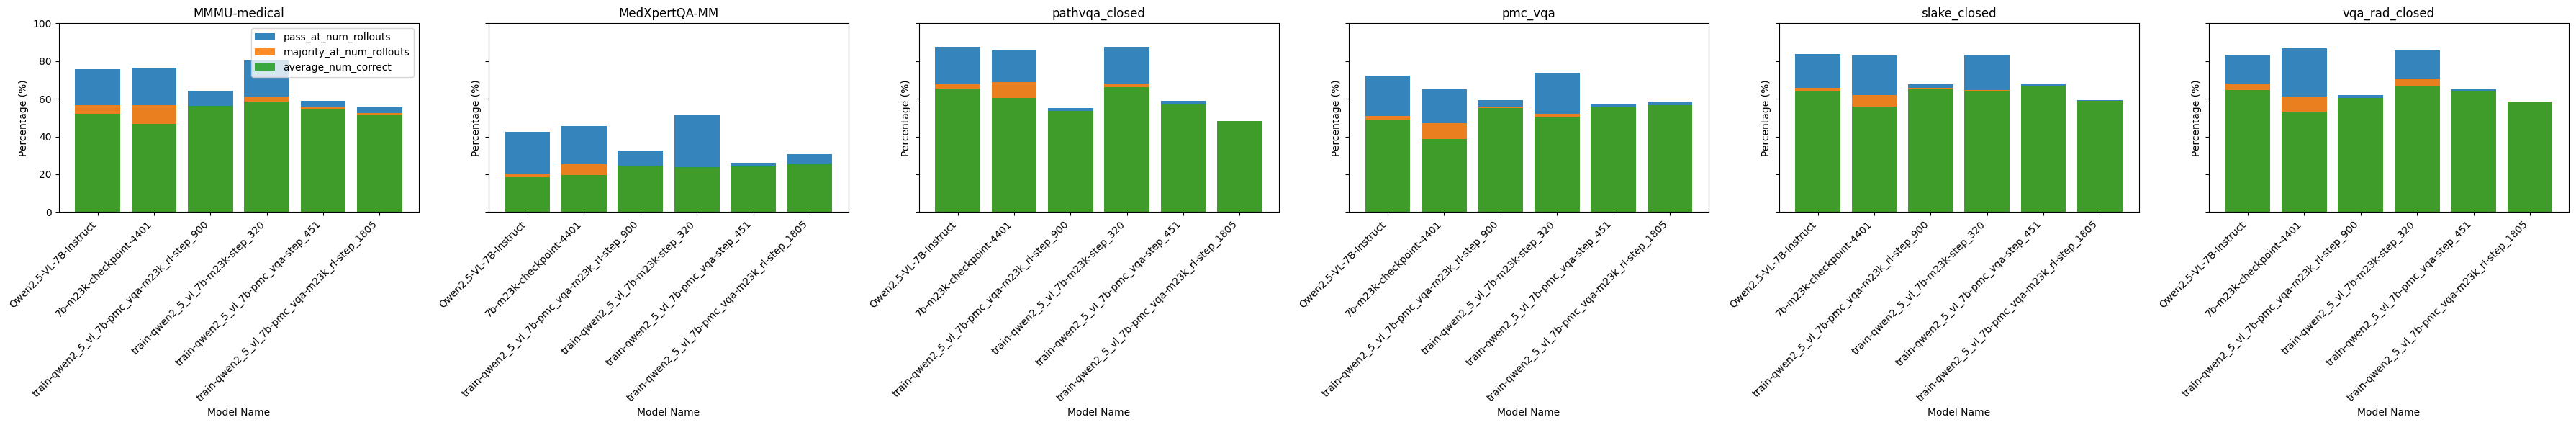

In [69]:
results_jsonl_list = [
    "outputs/temp_0.5-n_5/v0/Qwen2.5-VL-7B-Instruct/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/7b-m23k-checkpoint-4401/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-pmc_vqa-m23k_rl-step_900/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-m23k-step_320/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-pmc_vqa-step_451/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-pmc_vqa-m23k_rl-step_1805/regraded_eval_results.jsonl",
]
df_list = []
for results_jsonl in results_jsonl_list:
    df_mean = read_results_jsonl(results_jsonl)
    df_list.append(df_mean)
df_all = pd.concat(df_list, ignore_index=True)

metrics = ['pass_at_num_rollouts', 'majority_at_num_rollouts', 'average_num_correct', ]
colors = ['C0', 'C1', 'C2']
alphas = [0.9, 0.9, 0.9]

datasets = df_all['dataset_name'].unique()
n_datasets = len(datasets)

fig, axes = plt.subplots(1, n_datasets, figsize=(6 * n_datasets, 6), sharey=True)

if n_datasets == 1:
    axes = [axes]

for i, dataset in enumerate(datasets):
    ax = axes[i]
    df_sub = df_all[df_all['dataset_name'] == dataset]
    x = range(len(df_sub))
    for j, metric in enumerate(metrics):
        ax.bar(
            x, df_sub[metric], 
            width=0.8, 
            alpha=alphas[j], 
            color=colors[j], 
            label=metric if i == 0 else None  # only label once for legend
        )
    ax.set_xticks(x)
    ax.set_xticklabels(df_sub['model_name'], rotation=45, ha='right')
    ax.set_title(dataset)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Model Name')
    ax.set_ylim(0, 100)  # set y-axis limit to 0-100 for percentage

axes[0].legend()
plt.tight_layout()
plt.show()

0it [00:00, ?it/s]

8216it [00:00, 39486.61it/s]
8216it [00:01, 6986.60it/s]
8216it [00:00, 9645.35it/s] 
8216it [00:00, 49014.67it/s]
8216it [00:00, 43702.75it/s]
8216it [00:00, 48284.36it/s]
8216it [00:00, 35583.45it/s]
8216it [00:01, 6753.94it/s]
8216it [00:00, 33059.60it/s]
8216it [00:00, 34473.74it/s]
8216it [00:00, 40849.85it/s]
8216it [00:00, 34502.05it/s]


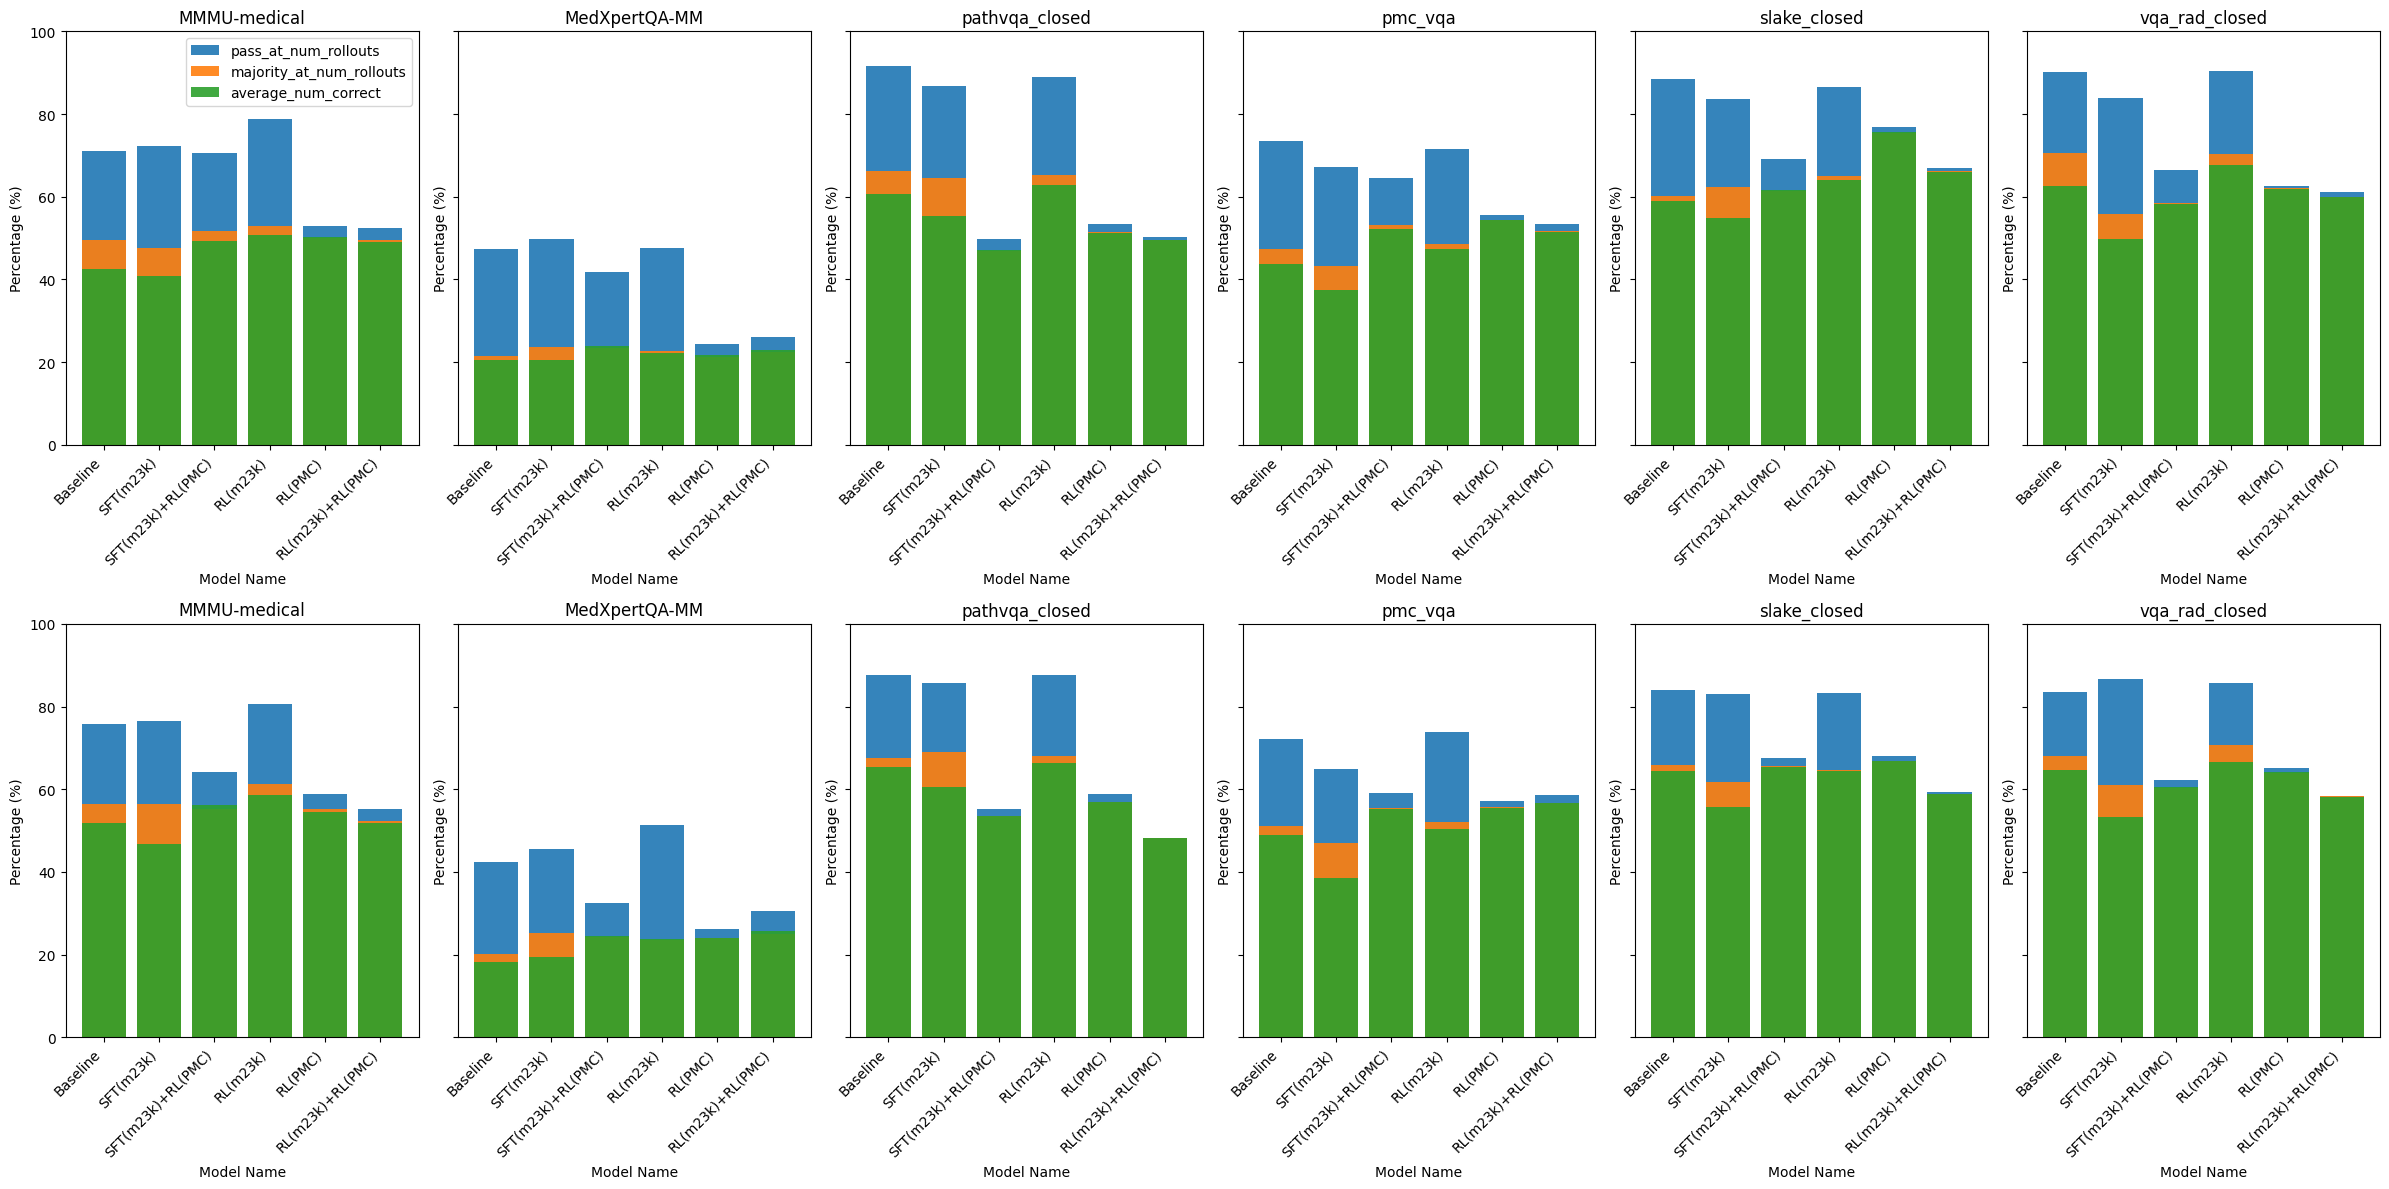

In [71]:
fig, axes = plt.subplots(2, n_datasets, figsize=(4 * n_datasets, 6 * 2), sharey=True)


results_jsonl_list = [
    "outputs/temp_0.5-n_5/v0/Qwen2.5-VL-3B-Instruct/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/3b-m23k-checkpoint-4401/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-pmc_vqa-m23k_sft_epoch_3-step_1150/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-m23k-step_320/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-pmc_vqa-step_451/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_3b-pmc_vqa-m23k_rl-step_1805/regraded_eval_results.jsonl",
]
model_names = [
    "Baseline",
    "SFT(m23k)",
    "SFT(m23k)+RL(PMC)",
    "RL(m23k)",
    "RL(PMC)",
    "RL(m23k)+RL(PMC)",
]
df_list = []
for results_jsonl in results_jsonl_list:
    df_mean = read_results_jsonl(results_jsonl)
    df_list.append(df_mean)
df_all = pd.concat(df_list, ignore_index=True)

metrics = ['pass_at_num_rollouts', 'majority_at_num_rollouts', 'average_num_correct', ]
colors = ['C0', 'C1', 'C2']
alphas = [0.9, 0.9, 0.9]

datasets = df_all['dataset_name'].unique()
n_datasets = len(datasets)

# if n_datasets == 1:
#     axes = [axes]

for i, dataset in enumerate(datasets):
    ax = axes[0][i]
    df_sub = df_all[df_all['dataset_name'] == dataset]
    x = range(len(df_sub))
    for j, metric in enumerate(metrics):
        ax.bar(
            x, df_sub[metric], 
            width=0.8, 
            alpha=alphas[j], 
            color=colors[j], 
            label=metric if i == 0 else None  # only label once for legend
        )
    ax.set_xticks(x)
    ax.set_xticklabels(df_sub['model_name'], rotation=45, ha='right')
    ax.set_title(dataset)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Model Name')
    ax.set_ylim(0, 100)  # set y-axis limit to 0-100 for percentage
    ax.set_xticklabels(model_names, rotation=45, ha='right')

# axes[0][0].legend()
# plt.tight_layout()
# plt.show()

results_jsonl_list = [
    "outputs/temp_0.5-n_5/v0/Qwen2.5-VL-7B-Instruct/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/7b-m23k-checkpoint-4401/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-pmc_vqa-m23k_rl-step_900/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-m23k-step_320/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-pmc_vqa-step_451/regraded_eval_results.jsonl",
    "outputs/temp_0.5-n_5/v0/train-qwen2_5_vl_7b-pmc_vqa-m23k_rl-step_1805/regraded_eval_results.jsonl",
]
model_names = [
    "Baseline",
    "SFT(m23k)",
    "SFT(m23k)+RL(PMC)",
    "RL(m23k)",
    "RL(PMC)",
    "RL(m23k)+RL(PMC)",
]

df_list = []
for results_jsonl in results_jsonl_list:
    df_mean = read_results_jsonl(results_jsonl)
    df_list.append(df_mean)
df_all = pd.concat(df_list, ignore_index=True)

metrics = ['pass_at_num_rollouts', 'majority_at_num_rollouts', 'average_num_correct', ]
colors = ['C0', 'C1', 'C2']
alphas = [0.9, 0.9, 0.9]

datasets = df_all['dataset_name'].unique()
n_datasets = len(datasets)

# fig, axes = plt.subplots(1, n_datasets, figsize=(6 * n_datasets, 6), sharey=True)

# if n_datasets == 1:
#     axes = [axes]

for i, dataset in enumerate(datasets):
    ax = axes[1][i]
    df_sub = df_all[df_all['dataset_name'] == dataset]
    x = range(len(df_sub))
    for j, metric in enumerate(metrics):
        ax.bar(
            x, df_sub[metric], 
            width=0.8, 
            alpha=alphas[j], 
            color=colors[j], 
            label=metric if i == 0 else None  # only label once for legend
        )
    ax.set_xticks(x)
    ax.set_xticklabels(df_sub['model_name'], rotation=45, ha='right')
    ax.set_title(dataset)
    ax.set_ylabel('Percentage (%)')
    ax.set_xlabel('Model Name')
    ax.set_ylim(0, 100)  # set y-axis limit to 0-100 for percentage
    ax.set_xticklabels(model_names, rotation=45, ha='right')

axes[0][0].legend()
plt.tight_layout()
plt.show()